### What is Logistic regression ?

Logistic Regression is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. It is also called Logit Regression.

Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation:

(z = beta_0 + beta_1 * x1)

Here, the coefficients beta_0 and beta_1 are the parameters of the model. The predicted response value is given by the above equation and is denoted by z. This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1 using sigmoid function.

Sigmoid function can be used to map predicted values to probability values. It has an S-shaped curve called sigmoid curve. It can be represented graphically as below:

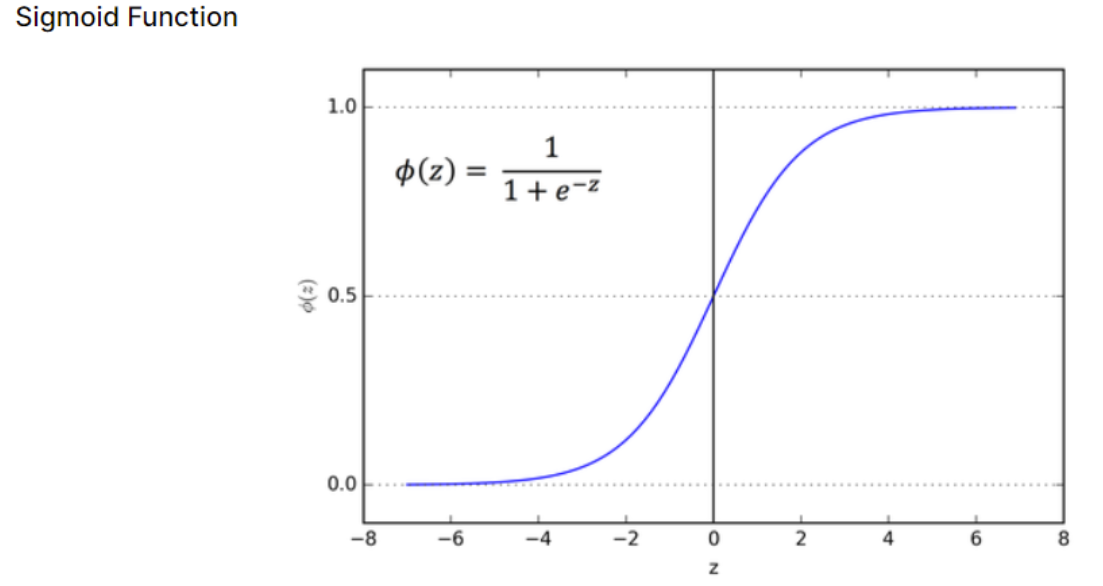

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0.

We use sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.

The Logistic Regression model requires several key assumptions.

- Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

- It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

- It requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

- It assumes linearity of independent variables and log odds.

- The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

### Load the libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
X_train=pd.read_csv("X_train.csv",index_col=0)
X_train.shape

(6434, 12)

In [3]:
X_test=pd.read_csv("X_test.csv",index_col=0)
X_test.shape

(1250, 12)

In [4]:
y_train=pd.read_csv("y_train.csv",index_col=0)
y_train.shape

(6434, 1)

In [5]:
y_test=pd.read_csv("y_test.csv",index_col=0)
y_test.shape

(1250, 1)

### Build the base Logit regression model with default parameters

##### Create the model

In [6]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver='lbfgs',#Algorithm to use in the optimization problem. Default is 'lbfgs'
                         C=1.0, #Inverse of regularization strength
                         penalty ='l2'#penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'
                        )
lr1

LogisticRegression()

##### Fit or train the model

In [7]:
lr1.fit(X_train,y_train.values.ravel())
#when we have y.shape == (5, 1), using y.ravel().shape == (5, ). In words... it flattens an array

LogisticRegression()

##### Make predictions on test data

In [8]:
y_pred_lr1 = lr1.predict(X_test)
y_pred_lr1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Model evaluation

We need to evaluate our models for answering the following questions:

- How well is our model doing? Is it a useful model?
- Will training our model on more data improve its performance?
- Do we need to include more features?
- etc

##### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix with 4 values.

- True Positive (TP) 

    - The predicted value matches the actual value
    - The actual value was positive and the model predicted a positive value

- True Negative (TN) 

    - The predicted value matches the actual value
    - The actual value was negative and the model predicted a negative value
    
- False Positive (FP) – Type 1 error

    - The predicted value was falsely predicted
    - The actual value was negative but the model predicted a positive value. Also known as the Type 1 error

- False Negative (FN) – Type 2 error

    - The predicted value was falsely predicted
    - The actual value was positive but the model predicted a negative value. Also known as the Type 2 error
    
Using these values, we can find several classification metrics.

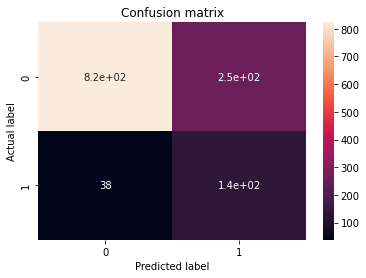

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test,y_pred_lr1)
sns.heatmap(cm1, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

##### Classification metrics

Accuracy is defined as the is the ratio of the total number of correct predictions and the total number of predictions. Higher values of accuracy, is a requirement.

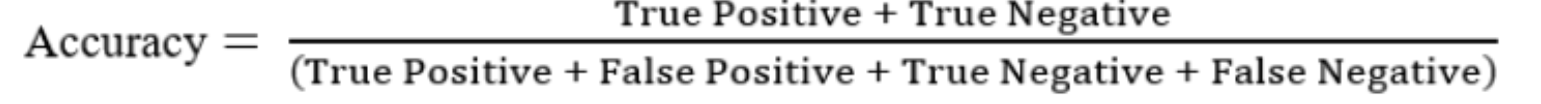


Precision is the ratio between the True Positives and all the Positives. Precision can be seen as a measure of quality. Precision also gives us a measure of the relevant data points. Higher precision values are desired.

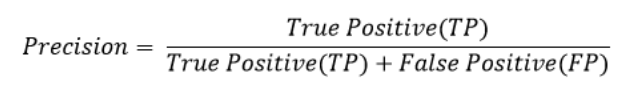



Recall is measure of our model correctly identifying True Positives. Recall also gives a measure of how accurately our model is able to identify the relevant data. Higher values are better.

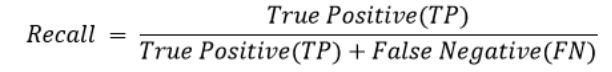

The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean.It is primarily used to compare the performance of two classifiers. It acts as a tradeoff between Precision and Recall. Higher the value, better it is.

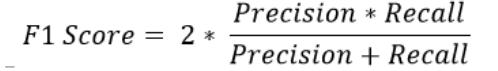








In [10]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

lr1_acc = accuracy_score(y_test,y_pred_lr1)
print("Base LR-Accuracy:", lr1_acc)
lr1_rec = recall_score(y_test,y_pred_lr1)
print("Base LR-Recall score:",lr1_rec)
lr1_f1 = f1_score(y_test,y_pred_lr1)
print("Base LR-F1 score:",lr1_f1)
lr1_ps = precision_score(y_test,y_pred_lr1)
print("Base LR-Precision score:",lr1_ps)

Base LR-Accuracy: 0.7672
Base LR-Recall score: 0.7816091954022989
Base LR-F1 score: 0.48312611012433393
Base LR-Precision score: 0.3496143958868895


##### ROC-AUC Curve

This curve shows us the behavior of the classifier for every threshold by plotting two variables: the True Positive Rate (TPR) and the False Positive Rate (FPR).

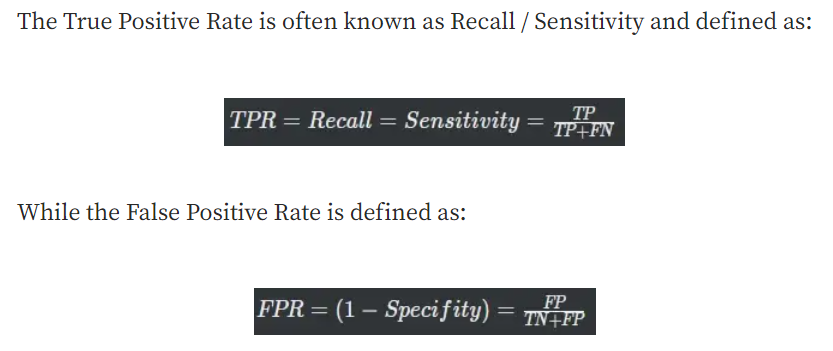

The intent of the ROC Curve is to show how well the model works for every possible threshold, as a relation of TPR vs FPR. So basically to plot the curve we need to calculate these variables for each threshold and plot it on a plane.

On the plots, the  red line represents where TPR = FPR, while the blue line represents the ROC curve of the classifier.If the ROC curve is exactly on the red line, it means that the classifier has the same predictive power as flipping a coin.

The AUROC Curve (Area Under ROC Curve) or simply ROC AUC Score, is a metric that allows us to compare different ROC Curves.

The red line is the lower limit, and the area under that line is 0.5, and the perfect ROC Curve would have an area of 1. As closer as our model’s ROC AUC is from 1, the better it is in separating classes and making better predictions.

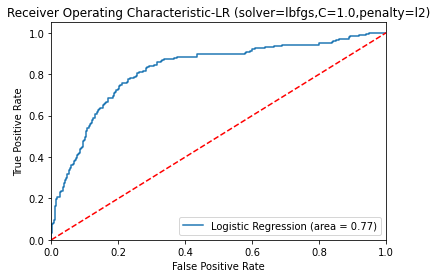

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lr1_roc_auc = roc_auc_score(y_test, lr1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-LR (solver=lbfgs,C=1.0,penalty=l2)')
plt.legend(loc="lower right")
plt.show()

If the blue line is relatively close to the red one, it means that the classifier is bad. The base LR model is a good enough classifier, closer to what is possible to get from real-world data. The AUC is a reasonable 0.77.

### Hyper parameter tuning

After building the model, the next challenge is how to fine-tune the hyperparameters of our model so that it works well with the dataset we have. It can be done quite easily using the GridSearchCV function in the sklearn module.

Cross validation is the base of this tuning methodology. The entire data is divided into k-folds (or k-parts, i.e. 10-fold means divide the dataset into 10 equal parts). Out of the k-folds, use 1 fold for testing and k-1 folds for training.

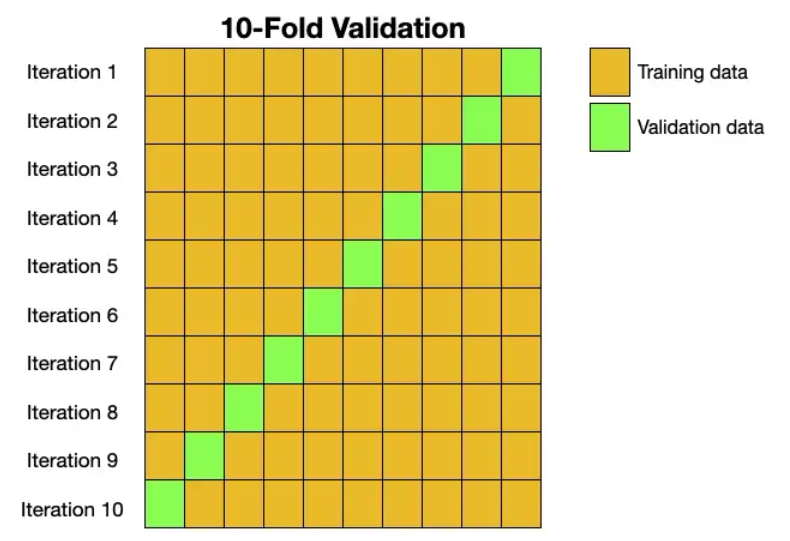

GridSearchCV is a function in sklearn’s model_selection package. It allows us to specify the different values for each hyperparameter and try out all the possible combinations when fitting our model. It does the training and testing using cross validation of our dataset — hence the acronym “CV” in GridSearchCV. The end result of GridSearchCV is a set of hyperparameters that best fit our data according to the scoring metric that we want our model to optimize on.

In [12]:
#grid search CV
from sklearn.model_selection import GridSearchCV

#dictionary containing all the various hyperparameters that you want to try when fitting your model
param_grid_lr ={'penalty':['none', 'l2'],#the norm of the penalty,
                  'C':[0.001,0.01,0.1,1,10,100,150,200,250,300,450,500, 600,700,800,900,1000]
                    #Inverse of regularization strength; must be a positive float
}
param_grid_lr

{'penalty': ['none', 'l2'],
 'C': [0.001,
  0.01,
  0.1,
  1,
  10,
  100,
  150,
  200,
  250,
  300,
  450,
  500,
  600,
  700,
  800,
  900,
  1000]}

In [13]:
#call the GridSearchCV() function using the algorithm that we are using, together with the various arguments
gs_lr = GridSearchCV(estimator=lr1,#estimator object
                  param_grid=param_grid_lr,
                  cv=10, #integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_lr

GridSearchCV(cv=10, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 150, 200, 250, 300,
                               450, 500, 600, 700, 800, 900, 1000],
                         'penalty': ['none', 'l2']},
             return_train_score=True, scoring='accuracy')

In [14]:
#train the model
gs_lr.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 150, 200, 250, 300,
                               450, 500, 600, 700, 800, 900, 1000],
                         'penalty': ['none', 'l2']},
             return_train_score=True, scoring='accuracy')

In [15]:
#create a dataframe with the Cross-validation results
df = pd.DataFrame(gs_lr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.038121,0.009480,0.004303,0.006647,0.001,none,"{'C': 0.001, 'penalty': 'none'}",0.777950,0.796584,0.824534,...,0.785492,0.787565,0.788119,0.791055,0.791573,0.789156,0.785702,0.791400,0.788813,0.002272
1,0.011496,0.006412,0.002067,0.004635,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.774845,0.793478,0.821429,...,0.774957,0.777547,0.779831,0.781385,0.784148,0.778967,0.782594,0.781385,0.779936,0.002552
2,0.044008,0.010726,0.000821,0.001981,0.01,none,"{'C': 0.01, 'penalty': 'none'}",0.777950,0.796584,0.824534,...,0.785492,0.787565,0.788119,0.791055,0.791573,0.789156,0.785702,0.791400,0.788813,0.002272
3,0.012524,0.006326,0.003237,0.006479,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.777950,0.791925,0.830745,...,0.784111,0.787392,0.785702,0.788292,0.788983,0.788810,0.789674,0.790019,0.787656,0.002011
4,0.048457,0.009696,0.001812,0.004712,0.1,none,"{'C': 0.1, 'penalty': 'none'}",0.777950,0.796584,0.824534,...,0.785492,0.787565,0.788119,0.791055,0.791573,0.789156,0.785702,0.791400,0.788813,0.002272


<AxesSubplot:xlabel='param_C', ylabel='mean_train_score'>

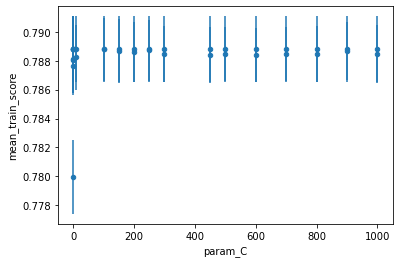

In [16]:
#plot mean_train_score vs Inverse of regularization strength parameter
df.plot.scatter("param_C",'mean_train_score', yerr="std_train_score")

<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

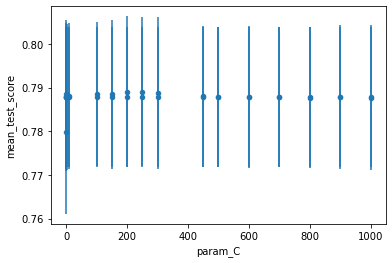

In [17]:
#plot mean_test_score vs Inverse of regularization strength parameter
df.plot.scatter("param_C",'mean_test_score', yerr="std_test_score")

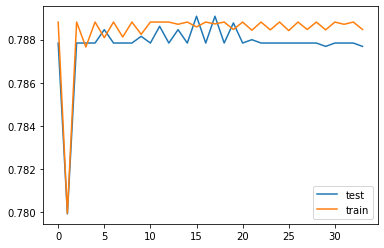

In [18]:
#plot the mean_test_score vs mean_train_score
import  matplotlib.pyplot as plt
test_scores = gs_lr.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_lr.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [19]:
#mean cross-validated score of the best_estimator
gs_lr.best_score_ 

0.7890823778290814

In [20]:
#parameter setting that gave the best results on the hold out data.
gs_lr.best_params_

{'C': 200, 'penalty': 'l2'}

In [21]:
gs_lr.best_estimator_

LogisticRegression(C=200)

### Refit the LR model with best parameters and make prediction on test data


In [22]:
lr2 = LogisticRegression(penalty='none',C=0.001)
lr2.fit(X_train,y_train)
y_pred_lr2 =lr2.predict(X_test)
y_pred_lr2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

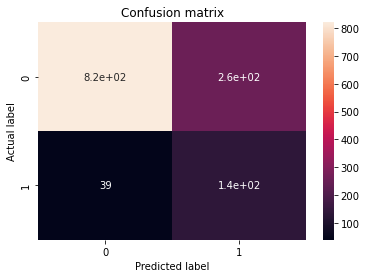

In [23]:
#create confusion matrix for the tuned model
cm2  = confusion_matrix(y_test,y_pred_lr2)
sns.heatmap(cm2, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
#generate the classification metrics for the tuned model
lr2_acc = accuracy_score(y_test,y_pred_lr2)
print("Optimised Logistic Regression: Accuracy", lr2_acc)
lr2_rec = recall_score(y_test,y_pred_lr2)
print("Optimised Logistic Regression: Recall score",lr2_rec)
lr2_f1 = f1_score(y_test,y_pred_lr2)
print("Optimised Logistic Regression: F1 score",lr2_f1)
lr2_ps = precision_score(y_test,y_pred_lr2)
print("Optimised Logistic Regression: Precision score",lr2_ps)

Optimised Logistic Regression: Accuracy 0.7648
Optimised Logistic Regression: Recall score 0.7758620689655172
Optimised Logistic Regression: F1 score 0.4787234042553192
Optimised Logistic Regression: Precision score 0.34615384615384615


 In comparison to the base model, the performance of these metrices have gone down a little bit.    

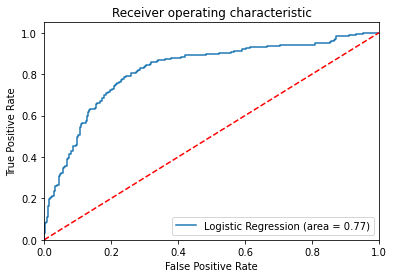

In [25]:
#generate the roc-auc curve for the tuned model
lr2_roc_auc = roc_auc_score(y_test, lr2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-LR (solver=lbfgs,C=0.001,penalty=none)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion

Since the performance of tuned model is less than or almost same as the base model, we cant say if Logistic regression is the best model for our data.